In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
X=df.iloc[:, 1:-1].values
Y=df.iloc[:,-1].values

In [20]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [21]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [22]:
Y = Y.reshape(len(Y),1)
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [23]:
from sklearn.preprocessing import StandardScaler
se_x= StandardScaler()
se_y= StandardScaler()
X=se_x.fit_transform(X)
Y=se_y.fit_transform(Y)

In [24]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [25]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [26]:
from sklearn.svm import SVR
re= SVR(kernel='rbf')
re.fit(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
se_y.inverse_transform(re.predict(se_x.transform([[6.5]])))

array([170370.0204065])

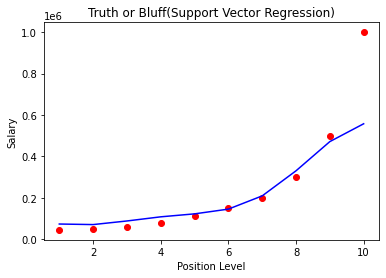

In [28]:
plt.scatter(se_x.inverse_transform(X),se_y.inverse_transform(Y), color ='red')
plt.plot(se_x.inverse_transform(X),se_y.inverse_transform(re.predict(X)), color='blue')
plt.title('Truth or Bluff(Support Vector Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

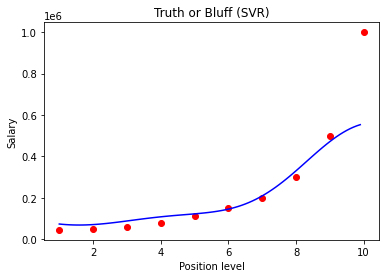

In [31]:
X_grid = np.arange(min(se_x.inverse_transform(X)), max(se_x.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(se_x.inverse_transform(X), se_y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, se_y.inverse_transform(re.predict(se_x.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()